In [1]:
import yaml
import xarray as xr
import matplotlib.pyplot as plt

diagname  = 'teleconnections'
machine   = 'wilma'
telecname = 'NAO'

with open(f'../../config/config_{machine}.yml', 'r', encoding='utf-8') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

with open(f'{diagname}.yml', 'r', encoding='utf-8') as file:
    namelist = yaml.load(file, Loader=yaml.FullLoader)

## Open index dataset and msl data

<AxesSubplot: xlabel='time'>

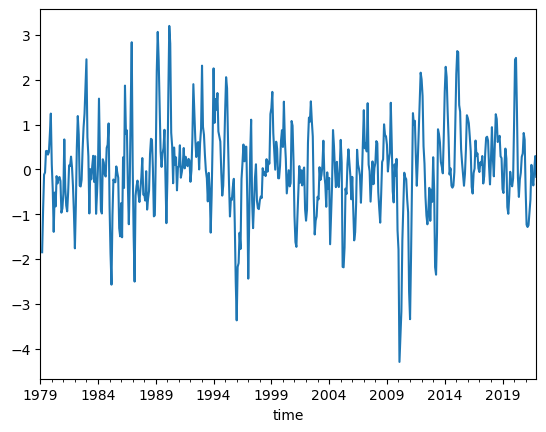

In [2]:
# Create name
infile = config[diagname]['output']
infile = infile + "/NAO_indx.nc"

# Open dataset
indx = xr.open_mfdataset(infile)

# Convert to dataframe
indx_df = indx.to_dataframe()

# Check data
indx_df.msl.plot()

In [3]:
# Generate name for msl data and open them
infile = config[diagname]['input']

field = xr.open_mfdataset(infile)['msl']

## Correlation and regression maps

To do: x and y-labels + ticks to be added to the plot, correct names in colorbar

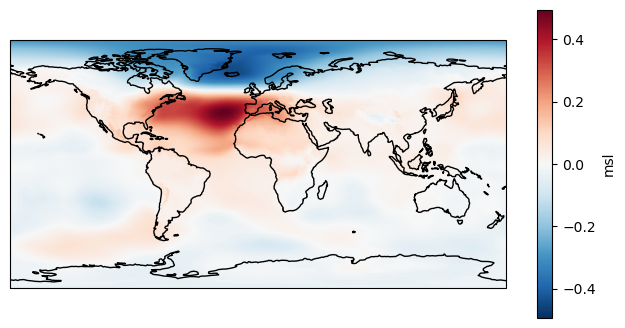

In [4]:
import cartopy.crs as ccrs

# Evaluate the map
cor0 = xr.corr(indx.msl, field, dim="time")

########
# Plot #
########

ccrs.PlateCarree()

plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.coastlines()
cor0.plot(ax=ax)

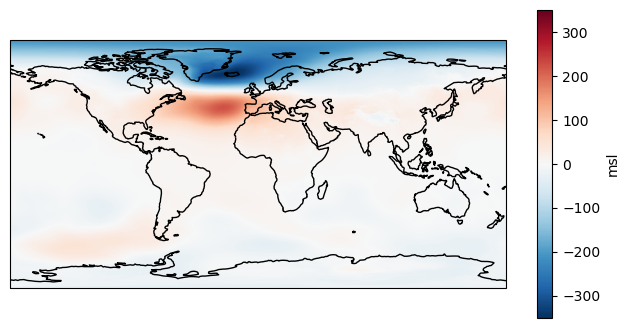

In [5]:
reg0 = xr.cov(indx.msl, field, dim="time")/indx.msl.var(dim='time',skipna=True).values

########
# Plot #
########

ccrs.PlateCarree()

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.coastlines()
reg0.plot(ax=ax)

## Regression map from another quantity

In [6]:
# Generate name for T data and open them
infile = config[diagname]['input_T']

field_T = xr.open_mfdataset(infile)
field_T = field_T.mean(dim='plev')
field_T['t']

<xarray.DataArray 't' (time: 516, lat: 721, lon: 1440)>
dask.array<mean_agg-aggregate, shape=(516, 721, 1440), dtype=float32, chunksize=(516, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0

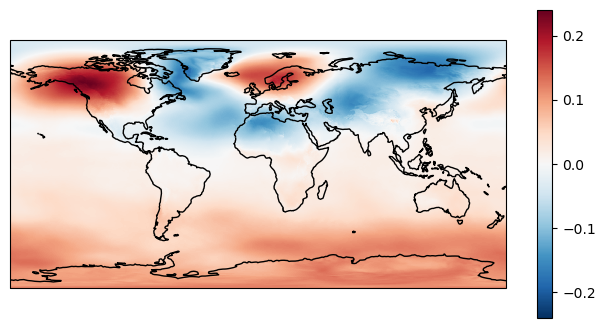

In [16]:
# Evaluate the map
#corT = xr.corr(indx.msl, field_T['t'], dim="time")
regT = xr.cov(indx.msl, field_T['t'], dim="time")/indx.msl.var(dim='time',skipna=True).values

########
# Plot #
########

ccrs.PlateCarree()

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.coastlines()
regT.plot(ax=ax)